> ### The Impact of Environmental Factors on Respiratory Diseases in Major Cities

**Objective**: Examine the effect of environmental factors on respiratory disease rates in major cities and identify the most significant contributors.

**Target Variable**: 'Respiratory Disease' (from metric_subcat_label)
**Relevant Independent Variables** (from metric_item_label):
- 'Air Quality'
- 'Population Density'
- 'Limited Supermarket Access'
- 'Public Transportation Use'
- 'Housing Lead Risk'


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
# dataset: https://bigcitieshealthdata.org/

# Load the data
data = pd.read_csv('BigCitiesHealth.csv')
data.head()

C:\Users\pih\AppData\Local\Temp\ipykernel_10928\1661524112.py:4: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('BigCitiesHealth.csv')


,metric_item_label,metric_cat_label,metric_subcat_label,metric_item_label_subtitle,metric_cat_item_yaxis_label,metric_source_desc_label_fn,metric_source_desc_label_url_fn,geo_label_city,geo_label_state,geo_label_citystate,...,value_90_ci_low,value_90_ci_high,geo_strata_region,geo_strata_poverty,geo_strata_Population,geo_strata_PopDensity,geo_strata_Segregation,strata_race_label,strata_sex_label,strata_race_sex_label
0,COVID-19 Deaths,Infectious Diseases,Respiratory Infection,"Deaths from COVID-19 (per 100,000 population, ...","Per 100,000","National Vital Statistics System (NVSS), Cente...",https://www.cdc.gov/nchs/nvss/index.htm,San Antonio,TX,"San Antonio, TX",...,NaN,NaN,South,Less poor cities (<20% poor),Largest (>1.3 million),Lower pop. density (<10k per sq mi),Less Segregated (<50%),White,Male,White Male
1,COVID-19 Deaths,Infectious Diseases,Respiratory Infection,"Deaths from COVID-19 (per 100,000 population, ...","Per 100,000","National Vital Statistics System (NVSS), Cente...",https://www.cdc.gov/nchs/nvss/index.htm,Houston,TX,"Houston, TX",...,NaN,NaN,South,Poorest cities (20%+ poor),Largest (>1.3 million),Lower pop. density (<10k per sq mi),Highly Segregated (50%+),White,Male,White Male
2,COVID-19 Deaths,Infectious Diseases,Respiratory Infection,"Deaths from COVID-19 (per 100,000 population, ...","Per 100,000","National Vital Statistics System (NVSS), Cente...",https://www.cdc.gov/nchs/nvss/index.htm,Fort Worth,TX,"Fort Worth, TX",...,NaN,NaN,South,Less poor cities (<20% poor),Smaller (<1.3 million),Lower pop. density (<10k per sq mi),Less Segregated (<50%),White,Male,White Male
3,COVID-19 Deaths,Infectious Diseases,Respiratory Infection,"Deaths from COVID-19 (per 100,000 population, ...","Per 100,000","National Vital Statistics System (NVSS), Cente...",https://www.cdc.gov/nchs/nvss/index.htm,El Paso,TX,"El Paso, TX",...,NaN,NaN,South,Less poor cities (<20% poor),Smaller (<1.3 million),Lower pop. density (<10k per sq mi),Less Segregated (<50%),White,Male,White Male
4,COVID-19 Deaths,Infectious Diseases,Respiratory Infection,"Deaths from COVID-19 (per 100,000 population, ...","Per 100,000","National Vital Statistics System (NVSS), Cente...",https://www.cdc.gov/nchs/nvss/index.htm,Dallas,TX,"Dallas, TX",...,NaN,NaN,South,Less poor cities (<20% poor),Largest (>1.3 million),Lower pop. density (<10k per sq mi),Highly Segregated (50%+),White,Male,White Male


In [4]:
# Preprocess the data
# Filter the data by the target and relevant independent variables
target_var = 'Respiratory Disease'
independent_vars = [
   'Air Quality'            ,
'Population Density'        ,
'Limited Supermarket Access',
'Public Transportation Use' ,
'Housing Lead Risk'         
]

respiratory_disease_data = data[data['metric_subcat_label']==target_var]

In [5]:
filtered_data = data[data['metric_subcat_label'].isin([target_var] + independent_vars)]

In [12]:
filtered_data = filtered_data.drop(columns=['value_90_ci_low','value_90_ci_high'])
filtered_data.head()

KeyError: "['value_90_ci_low', 'value_90_ci_high'] not found in axis"

In [ ]:
# Perform data cleaning if necessary
# For example, handling missing values, incorrect data types, etc.

# Descriptive statistics
filtered_data.describe()

,geo_fips_code,value,date_label,value_95_ci_low,value_95_ci_high
count,1.346000e+03,1381.000000,1381.000000,379.000000,379.000000
mean,2.828109e+06,24.502652,2015.320058,19.675119,27.584169
std,1.669816e+06,20.083989,3.282864,5.410780,6.135426
min,4.550000e+05,0.001000,2010.000000,7.010000,15.320000
25%,8.200000e+05,7.377049,2013.000000,15.685000,22.855000
50%,2.743000e+06,22.191781,2015.000000,19.530000,26.330000
75%,4.260000e+06,33.100000,2018.000000,23.540000,32.000000
max,5.553000e+06,95.342466,2021.000000,33.840000,46.960000


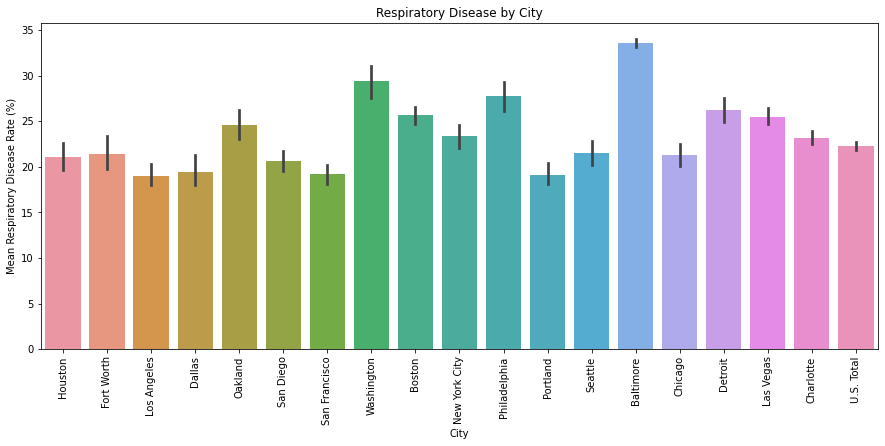

In [ ]:
# Visualizations
# Group the data by city and compute the mean yearlt value for 'Mental Health'
city_respiratory_diease = respiratory_disease_data.groupby('geo_label_city')['value'].mean().reset_index()

# Barplot of 'Adult Obesity' mean value for each city
plt.figure(figsize=(15, 6))
sns.barplot(x='geo_label_city', y='value', data=respiratory_disease_data)
plt.title('Respiratory Disease by City')
plt.xlabel('City')
plt.xticks(rotation=90)
plt.ylabel('Mean Respiratory Disease Rate (%)')
plt.show()

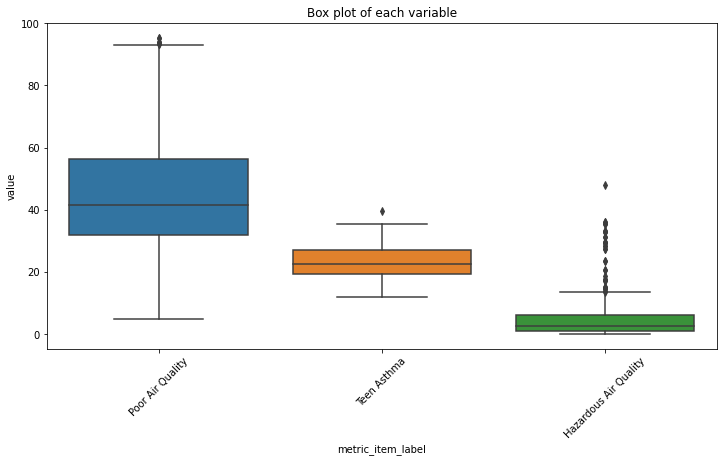

In [ ]:
# Box plot to show the distribution of data for each variable
plt.figure(figsize=(12, 6))
sns.boxplot(data=filtered_data, x='metric_item_label', y='value')
plt.xticks(rotation=45)
plt.title('Box plot of each variable')
plt.show()


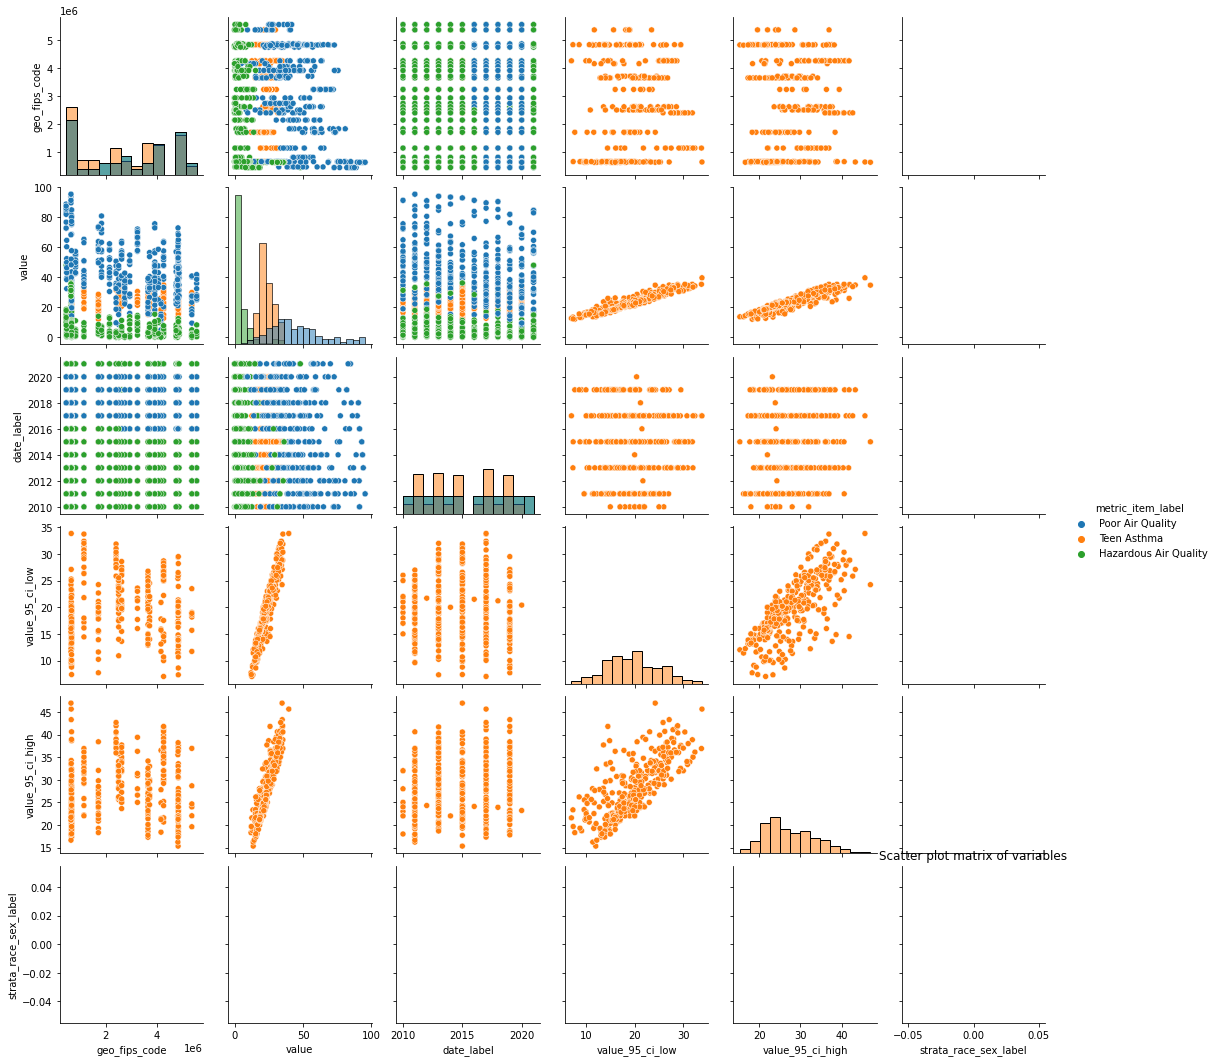

In [ ]:
# Scatter plot matrix to visualize relationships between variables
sns.pairplot(filtered_data, hue='metric_item_label', diag_kind='hist')
plt.title('Scatter plot matrix of variables')
plt.show()

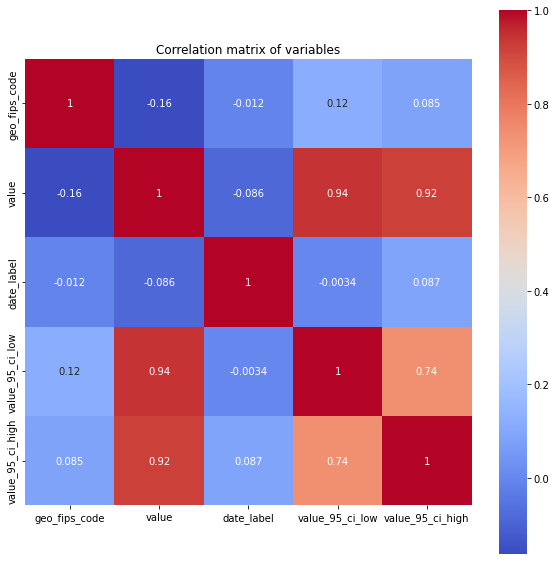

In [13]:
# Correlation matrix to show correlation coefficients between variables
corr_matrix = filtered_data.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation matrix of variables')
plt.show()